In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import pandas as pd

In [2]:
print(tf.__version__)

2.10.0


In [3]:
X = tf.reshape(tf.range(0,100,2),shape=(50,1))
y = X + 10 

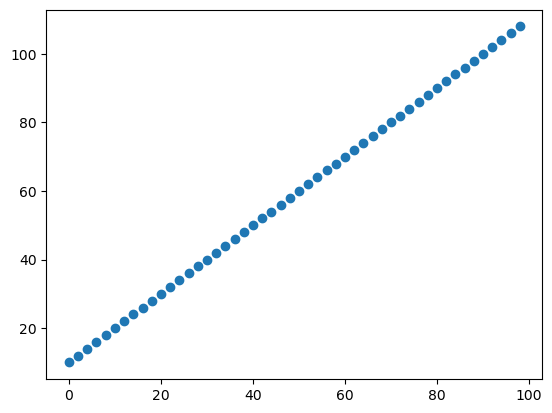

In [4]:
plt.scatter(X,y)

In [5]:
X_train,X_test = X[:40],X[40:]
y_train,y_test = y[:40],y[40:]

In [6]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

(TensorShape([40, 1]),
 TensorShape([10, 1]),
 TensorShape([40, 1]),
 TensorShape([10, 1]))

In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mae"]
             )

In [8]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
2/2 [==============================] - 0s 4ms/step - loss: 36.1833 - mae: 36.1833
Epoch 2/200
2/2 [==============================] - 0s 3ms/step - loss: 34.1615 - mae: 34.1615
Epoch 3/200
2/2 [==============================] - 0s 4ms/step - loss: 32.1052 - mae: 32.1052
Epoch 4/200
2/2 [==============================] - 0s 3ms/step - loss: 29.9409 - mae: 29.9409
Epoch 5/200
2/2 [==============================] - 0s 4ms/step - loss: 27.6966 - mae: 27.6966
Epoch 6/200
2/2 [==============================] - 0s 4ms/step - loss: 25.2990 - mae: 25.2990
Epoch 7/200
2/2 [==============================] - 0s 5ms/step - loss: 22.7360 - mae: 22.7360
Epoch 8/200
2/2 [==============================] - 0s 2ms/step - loss: 20.0325 - mae: 20.0325
Epoch 9/200
2/2 [==============================] - 0s 3ms/step - loss: 17.2514 - mae: 17.2514
Epoch 10/200
2/2 [==============================] - 0s 3ms/step - loss: 14.2347 - mae: 14.2347
Epoch 11/200
2/2 [==============================] - 0s 4ms/

In [9]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 76ms/step


array([[ 89.07186 ],
       [ 91.05704 ],
       [ 93.04222 ],
       [ 95.0274  ],
       [ 97.01258 ],
       [ 98.99776 ],
       [100.982925],
       [102.96811 ],
       [104.953285],
       [106.93846 ]], dtype=float32)

In [10]:
y_test

<tf.Tensor: shape=(10, 1), dtype=int32, numpy=
array([[ 90],
       [ 92],
       [ 94],
       [ 96],
       [ 98],
       [100],
       [102],
       [104],
       [106],
       [108]])>

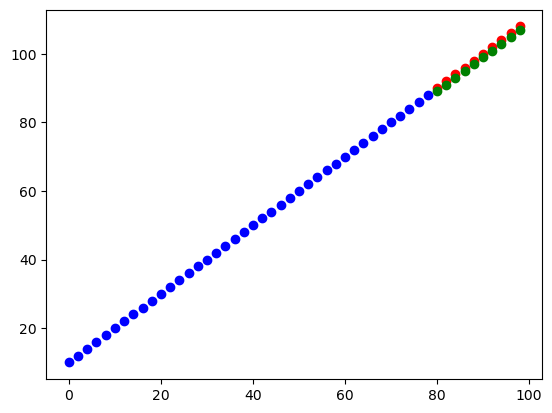

In [12]:
plt.scatter(X_train,y_train,c="b")
plt.scatter(X_test,y_test,c="r")
plt.scatter(X_test,y_pred,c="g")

In [13]:
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 122ms/step - loss: 0.9948 - mae: 0.9948


[0.9948364496231079, 0.9948364496231079]

In [14]:
def plot_prediction(X_train = X_train, y_train= y_train,
                     X_test = X_test, y_test = y_test, y_pred= y_pred):
    plt.scatter(X_train,y_train,c="b",label="training data")
    plt.scatter(X_test,y_test,c="g",label="testing data")
    plt.scatter(X_test,y_pred,c="r",label="predicted data")

In [15]:
y_test_1d = tf.squeeze(y_test)
y_test_1d

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 90,  92,  94,  96,  98, 100, 102, 104, 106, 108])>

In [16]:
y_pred_1d = tf.squeeze(y_pred)
y_pred_1d

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 89.07186 ,  91.05704 ,  93.04222 ,  95.0274  ,  97.01258 ,
        98.99776 , 100.982925, 102.96811 , 104.953285, 106.93846 ],
      dtype=float32)>

In [17]:
tf.keras.metrics.mean_absolute_error(y_true = y_test_1d,y_pred = y_pred_1d)

<tf.Tensor: shape=(), dtype=float32, numpy=0.99483645>

In [18]:
y_test.shape,y_pred.shape

(TensorShape([10, 1]), (10, 1))

In [19]:
tf.metrics.mean_squared_error(tf.squeeze(y_test),tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=0.991512>

In [20]:
# function for mae ans mse
def mse(y_true,y_pred):
    return tf.metrics.mean_squared_error(tf.squeeze(y_test),tf.squeeze(y_pred))
def mae(y_true,y_pred):
    return tf.metrics.mean_absolute_error(tf.squeeze(y_test),tf.squeeze(y_pred))

## Exprimenting on our model to minimize loss

```model-1```

In [21]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [22]:
model_1.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 2ms/step - loss: 20.9435 - mae: 20.9435
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 20.1589 - mae: 20.1589
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 19.3421 - mae: 19.3421
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 18.5362 - mae: 18.5362
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 17.7266 - mae: 17.7266
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 16.9480 - mae: 16.9480
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 16.1440 - mae: 16.1440
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 15.3712 - mae: 15.3712
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 14.5362 - mae: 14.5362
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 13.7445 - mae: 13.7445
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [23]:
y_pred_1 = model_1.predict(X_test)
y_pred_1

1/1 [==============================] - 0s 44ms/step


array([[ 93.201515],
       [ 95.49737 ],
       [ 97.79322 ],
       [100.08907 ],
       [102.38492 ],
       [104.68077 ],
       [106.97662 ],
       [109.27248 ],
       [111.56833 ],
       [113.864174]], dtype=float32)

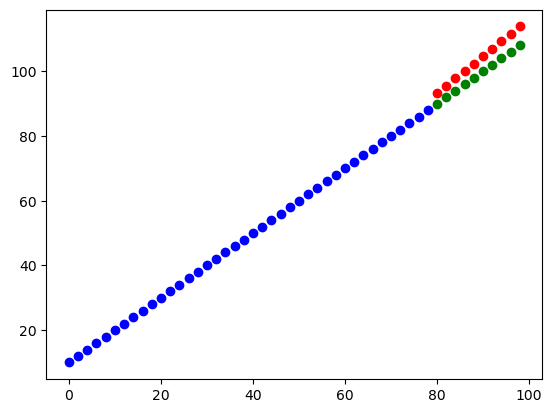

In [24]:
plot_prediction(y_pred = y_pred_1)

In [35]:
mae_1 = mae(y_test,y_pred_1) 
mse_1 = mse(y_test,y_pred_1 )
mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=4.532847>,
 <tf.Tensor: shape=(), dtype=float32, numpy=21.268805>)

**BUILD** ```Model-2```

In [26]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mse"])

model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 3ms/step - loss: 24.8696 - mse: 696.6425
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 22.3926 - mse: 557.3915
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 19.6959 - mse: 421.7567
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 16.8954 - mse: 302.6620
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 13.9407 - mse: 200.5791
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 10.9636 - mse: 121.4030
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 7.7374 - mse: 61.5811
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 4.6305 - mse: 29.0860
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 4.5292 - mse: 28.2103
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 5.6878 - mse: 43.7266
Epoch 11/100
2/2 [==============================] - 0s 4m

In [27]:
y_preds_2 = model_2.predict(X_test)
y_preds_2

1/1 [==============================] - 0s 54ms/step


array([[ 92.10845 ],
       [ 94.27897 ],
       [ 96.44947 ],
       [ 98.61999 ],
       [100.79049 ],
       [102.961006],
       [105.131516],
       [107.302025],
       [109.472534],
       [111.64304 ]], dtype=float32)

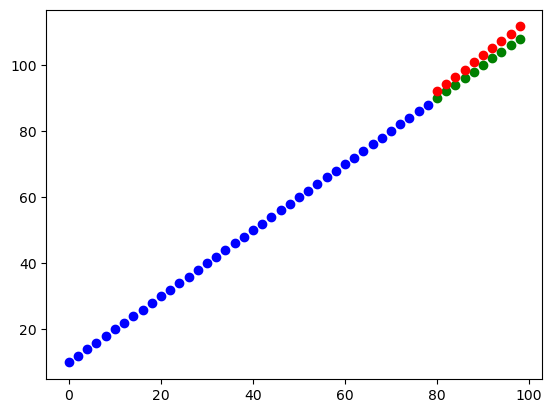

In [28]:
plot_prediction(y_pred = y_preds_2)

In [36]:
mae_2 = mae(y_test,y_preds_2)
mse_2 =mse(y_test,y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=2.875749>,
 <tf.Tensor: shape=(), dtype=float32, numpy=8.509791>)

**Model-3**

In [31]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
              metrics=["mae"])

model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 3ms/step - loss: 48.3556 - mae: 48.3556
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 46.4964 - mae: 46.4964
Epoch 3/500
2/2 [==============================] - 0s 3ms/step - loss: 44.6941 - mae: 44.6941
Epoch 4/500
2/2 [==============================] - 0s 4ms/step - loss: 42.9148 - mae: 42.9148
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 41.1238 - mae: 41.1238
Epoch 6/500
2/2 [==============================] - 0s 4ms/step - loss: 39.3960 - mae: 39.3960
Epoch 7/500
2/2 [==============================] - 0s 2ms/step - loss: 37.6712 - mae: 37.6712
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 36.0162 - mae: 36.0162
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 34.1674 - mae: 34.1674
Epoch 10/500
2/2 [==============================] - 0s 3ms/step - loss: 32.3492 - mae: 32.3492
Epoch 11/500
2/2 [==============================] - 0s 3ms/

In [32]:
y_preds_3 = model_3.predict(y_test)
y_preds_3,y_test

1/1 [==============================] - 0s 49ms/step


(array([[101.3723 ],
        [103.40166],
        [105.431  ],
        [107.46034],
        [109.4897 ],
        [111.51905],
        [113.5484 ],
        [115.57775],
        [117.6071 ],
        [119.63645]], dtype=float32),
 <tf.Tensor: shape=(10, 1), dtype=int32, numpy=
 array([[ 90],
        [ 92],
        [ 94],
        [ 96],
        [ 98],
        [100],
        [102],
        [104],
        [106],
        [108]])>)

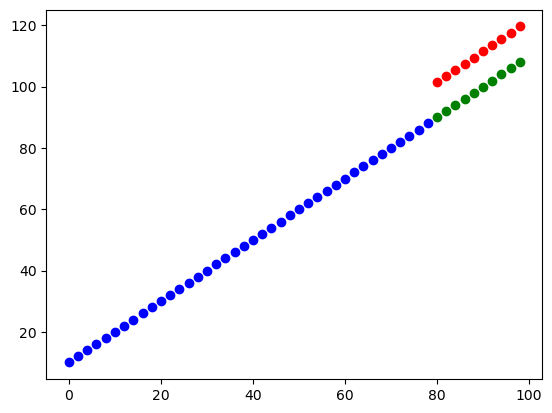

In [33]:
plot_prediction(y_pred = y_preds_3)

In [37]:
mae_3 = mae(y_test,y_preds_3)
mse_3 = mse(y_test,y_preds_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=11.504375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=132.35776>)

In [44]:
model_results = {
    "model":["model_1","model_2","model_3"],
    "mae":[mae_1.numpy(),mae_2.numpy(),mae_3.numpy()],
    "mse":[mse_1.numpy(),mse_2.numpy(),mse_3.numpy()]
}
all_results = pd.DataFrame(model_results)

In [45]:
all_results.head()

,model,mae,mse
0,model_1,4.532847,21.268805
1,model_2,2.875749,8.509791
2,model_3,11.504375,132.357758


### SAVE AND LOAD MODEL

> saving model in the `save model` format

In [46]:
model_2.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


> saving model in `hdf5` format

In [47]:
model_2.save("my_model_hdf5.h5")

Loading the model

In [50]:
saved_model = tf.keras.models.load_model("my_model")

In [51]:
saved_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


#### comparing the output of the saved model and the existing model

In [52]:
model_2_preds = model_2.predict(X_test)
saved_model_preds = saved_model.predict(X_test)
model_2_preds == saved_model_preds

1/1 [==============================] - 0s 154ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [53]:
saved_model_h5 =tf.keras.models.load_model("my_model_hdf5.h5")

In [54]:
saved_model_h5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                20        
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
